# Circular Linked List

- A variant of the singly linked list wherein the tail node points to the head node, rather than pointing to null
-  Useful for circular/ cyclic operations e.g. 
    - keeping track of players in a multiplayer game, 
    - scheduling oftasks by the ooperating system,
    - Undo functionality, 
    - changing chanels on the TV

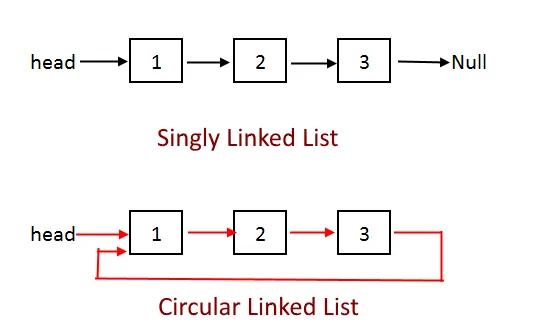

## Insertions
- keep in mind that the tail node now points to the head node, so we have to keep that structure in mind
- To maintain the constant time O(1) of the prepend / push insertion,:
    - initialise a tail node 
    - store the address of the the original head in the tail node. 

By doing so, each time I push a new node - which becomes the new head- the tail node will set to point to the new node.
- Of course there is a memory trade-off of initialising an extra variable tail node. But I think its worth the extra space, because the alternative would take O(n):
    - prepend new node by pointing it to current head
    - traverse the linked list to find the node that points to current head i.e. tail node
    - set tail.node to point to new node
    - update new node as head
    


In [27]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.next = None
        
class CircularLL(object):
    def __init__(self, head=None, tail_node=None):
        self.head = head
        self.size = 0
        self.tail_node=tail_node #to keep track for prepend insertions, in order to maintain O(1)
        
    def print_list(self):
        items = []
        curr_node = self.head
        while (curr_node!= None and curr_node.next!=self.head):
            items.append(curr_node.data)
            curr_node = curr_node.next
        ##the tail node will not be printed in while since it points to head
        items.append(curr_node.data)
        items.append(curr_node.next.data) ##want to see if its cicular 
        return  items
         
    """insert by prepending O(1)"""
    def insert_push(self,data):
        new_node = Node(data)
        if self.head is None:
            self.head =  Node(data)
            self.head.next = self.head
            self.tail_node = self.head
        else:
            #set new node as head / front of list
            new_node.next = self.head
            self.head = new_node
            #set current tail_node to point to new head
            self.tail_node.next = new_node   
        self.size+=1
    
    """insert by appending new node to end of list O(n) """
    def append(self,data):
        new_node = Node(data)
        #check if list is empty
        if self.head is None:
            self.head =  new_node
            #set head to point to itsel
            self.head.next = self.head
        else:
            new_node = Node(data)
        
        #to append new node to tail node
        #in circ linked list the tail node points the head node
        curr_node  = self.head
        while (curr_node!=None and curr_node.next!=self.head):
            curr_node = curr_node.next   
        
        curr_node.next  =  new_node
        new_node.next = self.head #set the new tail to point to head
        self.size+=1
        
        
        

In [24]:
circ_ll = CircularLL()

In [25]:
for i in range(10):
    circ_ll.insert_push(i)

In [26]:
circ_ll.print_list()

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 9]

In [28]:
circ_ll.size

10

#### i reasoned this out all by myself. I am quickly improving compared to last week

# Deletion 
- find the target node
- check if the target node is the tail: if so, then let its previous node point to head

In [37]:

class Node(object):
    def __init__(self, data):
        self.data =  data
        self.next  =  None
        
class CircularLL(object):
    
    def __init__(self, head=None, tail=None):
        self.head =  head
        self.tail = None
        self.size = 0
        
        
    def print_list(self):
        items = []
        curr = self.head
        while (curr!= None and curr.next!=self.head):
            items.append(curr.data)
            curr = curr.next
        ##the tail node will not be printed in while since it points to head
        items.append(curr.data)
        #items.append(curr.next.data) ##want to see if its cicular 
        return  items
        
    """ O(1) insert """
    def insert_push(self, data):
        node =  Node(data)
        if self.head is None:
            self.head = node
            self.head.next =  self.head  #circular
            self.tail =  self.head
        else:
            node.next = self.head
            self.head = node
            #set current tail_node to point to new head
            self.tail.next = node
        self.size+=1
        
    """ REMOVE first instance of a node that matches target data O(n)"""
    
    def delete(self, key):
        
        if self.head is None:
            return "Nothing is deleted! List is empty!"
        
        if self.head.data == key:
            #set tail node skip over head
            self.tail.next = self.head.next
            self.head =  self.head.next
            self.size-=1
            return 'Node deleted!'
        
        prev = None
        curr = self.head
        
        #traverse until target is reach, or the list restarts
        while (curr):
            if curr.data == key:
                prev.next =  curr.next
                ##check if the target node is tail node
                if curr.next == self.head:
                    self.tail = prev
                del curr
                self.size-=1
                return f"Node deleted!"
            
            
            elif curr.next == self.head:
                return "Target not found!"
            ##traverse the list
            else:
                prev = curr
                curr = curr.next

In [38]:
circ_ll = CircularLL()
for i in range(10):
    circ_ll.insert_push(i)
circ_ll.print_list()

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [39]:
#delete head
circ_ll.delete(9)
circ_ll.print_list()

[8, 7, 6, 5, 4, 3, 2, 1, 0]

In [41]:
circ_ll.head.data

8

In [42]:
circ_ll.tail.data

0

In [43]:
circ_ll.delete(5)
circ_ll.print_list()

[8, 7, 6, 4, 3, 2, 1, 0]